In [1825]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

from scipy import stats
from scipy.stats import skew

In [1826]:
df = pd.read_csv('nyc-rolling-sales.csv')
df.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [1827]:
#Dropping useless columns
del df['Unnamed: 0']
df.pivot_table(index='BUILDING CLASS CATEGORY', values='SALE PRICE', aggfunc=np.max)

,SALE PRICE
BUILDING CLASS CATEGORY,
01 ONE FAMILY DWELLINGS,9999999
02 TWO FAMILY DWELLINGS,999999
03 THREE FAMILY DWELLINGS,999999
04 TAX CLASS 1 CONDOS,999000
05 TAX CLASS 1 VACANT LAND,999999
06 TAX CLASS 1 - OTHER,95000
07 RENTALS - WALKUP APARTMENTS,999000
08 RENTALS - ELEVATOR APARTMENTS,9862645
09 COOPS - WALKUP APARTMENTS,999950


In [1828]:
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("BUILDINGS")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("DWELLINGS")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("FACILITIES")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("OTHER")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("HOTELS")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("/")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("LAND")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("COMMERCIAL")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("LOTS")]
df.pivot_table(index='BUILDING CLASS CATEGORY', values='SALE PRICE', aggfunc=np.max)

,SALE PRICE
BUILDING CLASS CATEGORY,
04 TAX CLASS 1 CONDOS,999000
07 RENTALS - WALKUP APARTMENTS,999000
08 RENTALS - ELEVATOR APARTMENTS,9862645
09 COOPS - WALKUP APARTMENTS,999950
10 COOPS - ELEVATOR APARTMENTS,999999
11A CONDO-RENTALS,999000
12 CONDOS - WALKUP APARTMENTS,999000
13 CONDOS - ELEVATOR APARTMENTS,999999
14 RENTALS - 4-10 UNIT,999000


In [1829]:
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("18")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("27")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("30")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("34")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("38")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("44")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("47")]
df.pivot_table(index='BUILDING CLASS CATEGORY', values='SALE PRICE', aggfunc=np.max)

,SALE PRICE
BUILDING CLASS CATEGORY,
04 TAX CLASS 1 CONDOS,999000
07 RENTALS - WALKUP APARTMENTS,999000
08 RENTALS - ELEVATOR APARTMENTS,9862645
09 COOPS - WALKUP APARTMENTS,999950
10 COOPS - ELEVATOR APARTMENTS,999999
11A CONDO-RENTALS,999000
12 CONDOS - WALKUP APARTMENTS,999000
13 CONDOS - ELEVATOR APARTMENTS,999999
14 RENTALS - 4-10 UNIT,999000


In [1830]:
#Check duplicates
sum(df.duplicated(df.columns))

253

In [1831]:
#Remove duplicates
df = df.drop_duplicates(df.columns, keep='first')

In [1832]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38031 entries, 0 to 84388
Data columns (total 21 columns):
BOROUGH                           38031 non-null int64
NEIGHBORHOOD                      38031 non-null object
BUILDING CLASS CATEGORY           38031 non-null object
TAX CLASS AT PRESENT              38031 non-null object
BLOCK                             38031 non-null int64
LOT                               38031 non-null int64
EASE-MENT                         38031 non-null object
BUILDING CLASS AT PRESENT         38031 non-null object
ADDRESS                           38031 non-null object
APARTMENT NUMBER                  38031 non-null object
ZIP CODE                          38031 non-null int64
RESIDENTIAL UNITS                 38031 non-null int64
COMMERCIAL UNITS                  38031 non-null int64
TOTAL UNITS                       38031 non-null int64
LAND SQUARE FEET                  38031 non-null object
GROSS SQUARE FEET                 38031 non-null object
YE

In [1833]:
#Clean
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')
df['SALE MONTH'] = pd.DatetimeIndex(df['SALE DATE']).month
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['BOROUGH'] = df['BOROUGH'].astype('category')
df['SALE MONTH'] = df['SALE MONTH'].astype('category')
df['ZIP CODE'] = df['ZIP CODE'].astype('category')
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')

In [1834]:
#check missing values
df.columns[df.isnull().any()]

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'], dtype='object')

In [1835]:
miss=df.isnull().sum()/len(df)
miss=miss[miss>0]
miss.sort_values(inplace=True)
miss

SALE PRICE           0.121138
LAND SQUARE FEET     0.640057
GROSS SQUARE FEET    0.640425
dtype: float64

In [1836]:
df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean())
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean())
data=df[~df['SALE PRICE'].isna()]

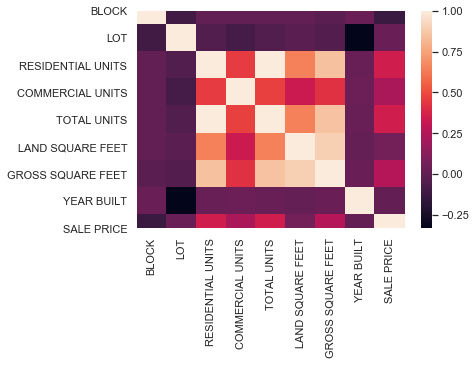

In [1837]:
#correlation between the features
corr = data.corr()
sns.heatmap(corr)

In [1838]:
#numeric correlation
corr = data.corr()
corr['SALE PRICE'].sort_values(ascending=False)

SALE PRICE           1.000000
TOTAL UNITS          0.354419
RESIDENTIAL UNITS    0.352909
GROSS SQUARE FEET    0.262033
COMMERCIAL UNITS     0.233729
LAND SQUARE FEET     0.058173
LOT                  0.026729
YEAR BUILT           0.008332
BLOCK               -0.125690
Name: SALE PRICE, dtype: float64

In [1839]:
#del data['LAND SQUARE FEET']
numeric_data=data.select_dtypes(include=[np.number])
numeric_data.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,33424.000000,33424.000000,33424.000000,33424.000000,33424.000000,3.342400e+04,3.342400e+04,33424.000000,3.342400e+04
mean,2823.390977,654.116354,2.299216,0.052148,2.351304,2.271885e+03,5.255995e+03,1747.256014,1.433168e+06
std,2647.066697,806.579882,20.243252,0.438140,20.445981,2.394981e+04,2.533990e+04,607.397666,5.261764e+06
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1040.000000,24.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1923.000000,2.750000e+05
50%,1646.000000,122.000000,1.000000,0.000000,1.000000,2.521340e+03,5.754822e+03,1951.000000,6.250000e+05
75%,4588.000000,1118.000000,1.000000,0.000000,1.000000,2.521340e+03,5.754822e+03,1979.000000,1.275000e+06
max,16254.000000,9106.000000,1844.000000,22.000000,1866.000000,4.228300e+06,3.750565e+06,2017.000000,6.200000e+08


In [1840]:
data=data[data['RESIDENTIAL UNITS']>0]
data['YEAR BUILT'][data['YEAR BUILT']==0]=1800
del data['BLOCK']
del data['LOT']
numeric_data=data.select_dtypes(include=[np.number])
numeric_data.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,17375.000000,17375.000000,17375.000000,1.737500e+04,1.737500e+04,17375.000000,1.737500e+04
mean,4.422964,0.100259,4.523108,2.627435e+03,6.132675e+03,1942.722935,2.024183e+06
std,27.909368,0.603668,28.184597,3.319749e+04,3.504127e+04,74.015308,7.104526e+06
min,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1800.000000,0.000000e+00
25%,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1910.000000,4.085000e+05
50%,1.000000,0.000000,1.000000,2.521340e+03,5.754822e+03,1962.000000,8.690000e+05
75%,1.000000,0.000000,1.000000,2.521340e+03,5.754822e+03,2007.000000,1.775000e+06
max,1844.000000,22.000000,1866.000000,4.228300e+06,3.750565e+06,2017.000000,6.200000e+08


In [1841]:
del data['TOTAL UNITS']
del data['COMMERCIAL UNITS']
del data['LAND SQUARE FEET']
numeric_data=data.select_dtypes(include=[np.number])
numeric_data.describe()

,RESIDENTIAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,17375.000000,1.737500e+04,17375.000000,1.737500e+04
mean,4.422964,6.132675e+03,1942.722935,2.024183e+06
std,27.909368,3.504127e+04,74.015308,7.104526e+06
min,1.000000,0.000000e+00,1800.000000,0.000000e+00
25%,1.000000,0.000000e+00,1910.000000,4.085000e+05
50%,1.000000,5.754822e+03,1962.000000,8.690000e+05
75%,1.000000,5.754822e+03,2007.000000,1.775000e+06
max,1844.000000,3.750565e+06,2017.000000,6.200000e+08


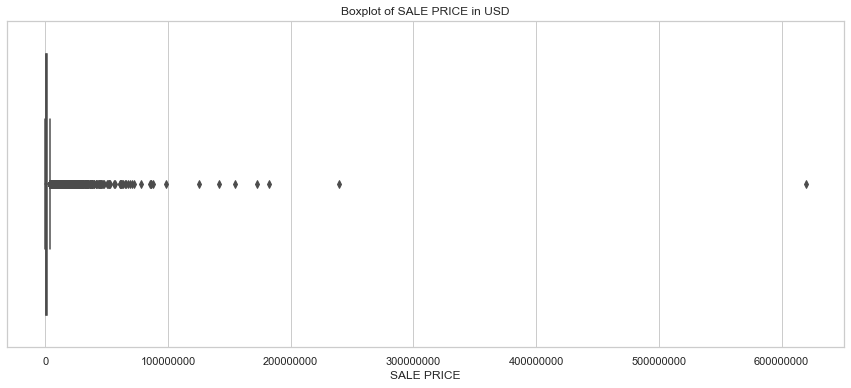

In [1842]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

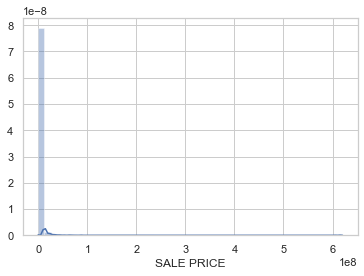

In [1843]:
sns.distplot(data['SALE PRICE'])

In [1844]:
# Remove observations that fall outside those caps
data = data[(data['SALE PRICE'] > 100000) & (data['SALE PRICE'] < 9000000)]

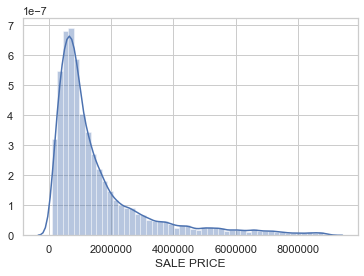

In [1845]:
sns.distplot(data['SALE PRICE'])

In [1846]:
data['SALE PRICE'].skew()

2.1792071050471615

0.12124523976438577


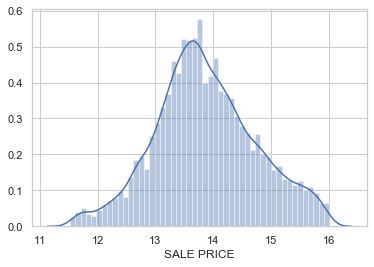

In [1847]:
sales=np.log(data['SALE PRICE'])
print(sales.skew())
sns.distplot(sales)

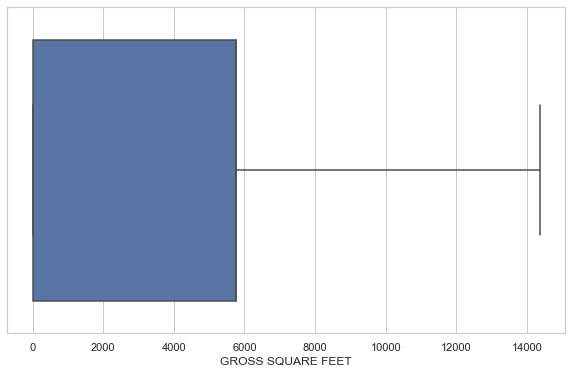

In [1848]:
plt.figure(figsize=(10,6))
sns.boxplot(x='GROSS SQUARE FEET', data=data,showfliers=False)

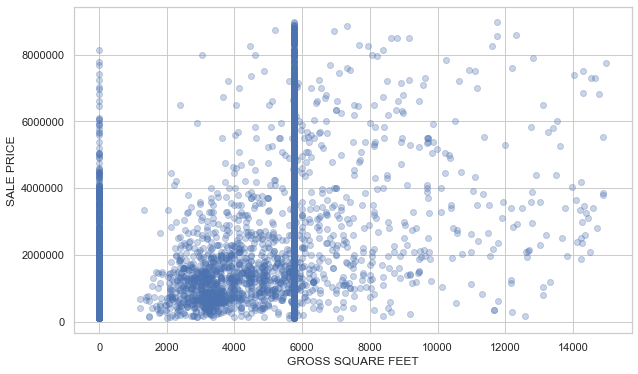

In [1849]:
data = data[data['GROSS SQUARE FEET'] < 15000]
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})

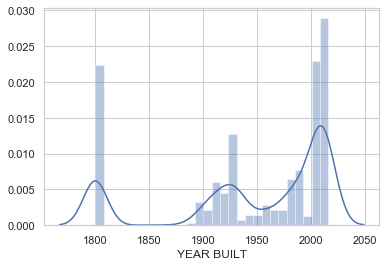

In [1850]:
sns.distplot(data['YEAR BUILT'])

In [1851]:
cat_data=data.select_dtypes(exclude=[np.number])
cat_data.describe()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,SALE MONTH
count,13992.0,13992,13992,13992,13992,13992,13992,13992,13992.0,13992.0,13992,13992,13992.0
unique,5.0,209,10,7,1,28,6432,2628,174.0,2.0,26,271,12.0
top,1.0,FLUSHING-NORTH,13 CONDOS - ELEVATOR APARTMENTS,2,,R4,131-05 40TH ROAD,,11354.0,2.0,R4,2017-03-31 00:00:00,6.0
freq,5769.0,831,9434,10260,13992,9430,209,1922,656.0,12788.0,9434,98,1476.0
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-31 00:00:00,NaN


In [1852]:
pivot=data.pivot_table(index='NEIGHBORHOOD', values='SALE PRICE', aggfunc=np.median)
pivot

,SALE PRICE
NEIGHBORHOOD,
AIRPORT LA GUARDIA,425000.0
ALPHABET CITY,1314316.5
ARDEN HEIGHTS,366750.0
ARROCHAR,1800000.0
ARROCHAR-SHORE ACRES,266000.0
...,...
WINDSOR TERRACE,857500.0
WOODHAVEN,417500.0
WOODLAWN,600000.0


In [1853]:
# BUILDING CLASS CATEGORY
print(data['BUILDING CLASS CATEGORY'].nunique())

pivot=data.pivot_table(index='BUILDING CLASS CATEGORY', values='SALE PRICE', aggfunc=np.median)
pivot

10


,SALE PRICE
BUILDING CLASS CATEGORY,
04 TAX CLASS 1 CONDOS,420405.0
07 RENTALS - WALKUP APARTMENTS,1400000.0
08 RENTALS - ELEVATOR APARTMENTS,5000000.0
09 COOPS - WALKUP APARTMENTS,3441000.0
10 COOPS - ELEVATOR APARTMENTS,550000.0
11A CONDO-RENTALS,999000.0
12 CONDOS - WALKUP APARTMENTS,529000.0
13 CONDOS - ELEVATOR APARTMENTS,1070000.0
14 RENTALS - 4-10 UNIT,1450000.0


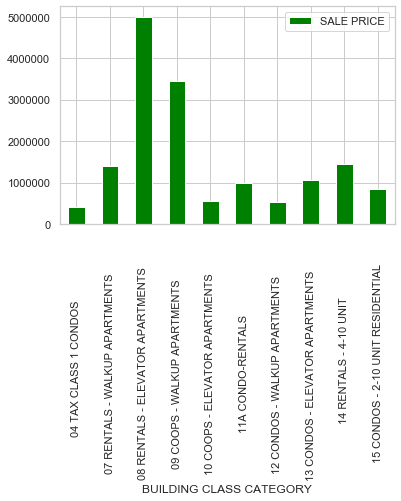

In [1854]:
pivot.plot(kind='bar', color='Green')

In [1855]:
del data['ADDRESS']
del data['APARTMENT NUMBER']

In [1856]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13992 entries, 0 to 84388
Data columns (total 15 columns):
BOROUGH                           13992 non-null category
NEIGHBORHOOD                      13992 non-null object
BUILDING CLASS CATEGORY           13992 non-null object
TAX CLASS AT PRESENT              13992 non-null object
EASE-MENT                         13992 non-null object
BUILDING CLASS AT PRESENT         13992 non-null object
ZIP CODE                          13992 non-null category
RESIDENTIAL UNITS                 13992 non-null int64
GROSS SQUARE FEET                 13992 non-null float64
YEAR BUILT                        13992 non-null int64
TAX CLASS AT TIME OF SALE         13992 non-null category
BUILDING CLASS AT TIME OF SALE    13992 non-null object
SALE PRICE                        13992 non-null float64
SALE DATE                         13992 non-null datetime64[ns]
SALE MONTH                        13992 non-null category
dtypes: category(4), datetime64[ns]

In [1857]:
numeric_data=data.select_dtypes(include=[np.number])
numeric_data.columns

Index(['RESIDENTIAL UNITS', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE'], dtype='object')

In [1858]:
#transform the numeric features using log(x + 1)
skewed = data[numeric_data.columns].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
data[skewed] = np.log1p(data[skewed])

In [1859]:

scaler = StandardScaler()
scaler.fit(data[numeric_data.columns])
scaled = scaler.transform(data[numeric_data.columns])

for i, col in enumerate(numeric_data.columns):
       data[col] = scaled[:,i]

In [1860]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,EASE-MENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,,C2,10009,2.250047,0.899102,-0.602288,2,C2,2.147403,2017-07-19,7
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,,C4,10009,3.686054,1.028732,-0.431122,2,C4,1.543161,2016-09-23,9
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,,C2,10009,2.615248,0.230812,-0.602288,2,C2,2.366288,2016-11-17,11
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,,C4,10009,3.210642,0.088365,-0.338956,2,C4,1.300214,2016-09-23,9
76,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,,R2,10009,-0.352694,0.648199,-1.918947,2,R2,-0.601994,2016-12-30,12


In [1861]:
del data['BOROUGH']
del data['TAX CLASS AT PRESENT']
del data['EASE-MENT']
del data['BUILDING CLASS AT PRESENT']
del data['ZIP CODE']
del data['TAX CLASS AT TIME OF SALE']
del data['BUILDING CLASS AT TIME OF SALE']
del data['SALE DATE']

In [1862]:
#Select the variables to be one-hot encoded
one_hot_features = ['BUILDING CLASS CATEGORY','NEIGHBORHOOD','SALE MONTH']

In [1863]:
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
one_hot_encoded = pd.get_dummies(data[one_hot_features])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13992 entries, 0 to 84388
Data columns (total 231 columns):
BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS                           13992 non-null uint8
BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS                  13992 non-null uint8
BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMENTS                13992 non-null uint8
BUILDING CLASS CATEGORY_09 COOPS - WALKUP APARTMENTS                    13992 non-null uint8
BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS                  13992 non-null uint8
BUILDING CLASS CATEGORY_11A CONDO-RENTALS                               13992 non-null uint8
BUILDING CLASS CATEGORY_12 CONDOS - WALKUP APARTMENTS                   13992 non-null uint8
BUILDING CLASS CATEGORY_13 CONDOS - ELEVATOR APARTMENTS                 13992 non-null uint8
BUILDING CLASS CATEGORY_14 RENTALS - 4-10 UNIT                          13992 non-null uint8
BUILDING CLASS CATEGORY_15 CONDOS - 2-10 UNIT RESIDEN

In [1864]:
# Replacing categorical columns with dummies
fdf = data.drop(one_hot_features,axis=1)
fdf = pd.concat([fdf, one_hot_encoded] ,axis=1)

In [1865]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13992 entries, 0 to 84388
Columns: 235 entries, RESIDENTIAL UNITS to SALE MONTH_12
dtypes: float64(4), uint8(231)
memory usage: 3.6 MB


In [1866]:
Y_fdf = fdf['SALE PRICE']
X_fdf = fdf.drop('SALE PRICE', axis=1)

X_fdf.shape , Y_fdf.shape

((13992, 234), (13992,))

In [1867]:
X_train ,X_test, Y_train , Y_test = train_test_split(X_fdf , Y_fdf , test_size = 0.3 , random_state =34)

In [1868]:
# Training set
X_train.shape , Y_train.shape

((9794, 234), (9794,))

In [1869]:
#Testing set
X_test.shape , Y_test.shape

((4198, 234), (4198,))

In [1870]:
# RMSE
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [1871]:
linreg = LinearRegression(normalize=True)
linreg.fit(X_train, Y_train)
Y_pred_lin = linreg.predict(X_test)


# caculate MSE, MAE, MAPE, and Accuracy
errors = abs(Y_pred_lin - Y_test)
mae = round(np.mean(errors), 2)
mape = round(np.mean(100 * (errors / Y_test)), 2)
accuracy = 100 - mape
print('R-squared: ', round(r2_score(Y_test, Y_pred_lin), 2))
print('RMSE: ', rmse(Y_test,Y_pred_lin))

R-squared:  -7.112255254879717e+24
RMSE:  2634102796835.6284


In [1872]:
alpha=0.00099
lasso_regr=Lasso(alpha=alpha,max_iter=50000)
lasso_regr.fit(X_train, Y_train)
Y_pred_lasso=lasso_regr.predict(X_test)

errors = abs(Y_pred_lasso - Y_test)
mae = round(np.mean(errors), 2)
mape = round(np.mean(100 * (errors / Y_test)), 2)
accuracy = 100 - mape
print('R-squared: ', round(r2_score(Y_test, Y_pred_lasso), 2))
print('RMSE: ', rmse(Y_test,Y_pred_lasso))


R-squared:  0.58
RMSE:  0.642312072317891


In [1873]:
rf_regr = RandomForestRegressor()
rf_regr.fit(X_train, Y_train)
Y_pred_rf = rf_regr.predict(X_test)


errors = abs(Y_pred_rf - Y_test)
mae = round(np.mean(errors), 2)
mape = round(np.mean(100 * (errors / Y_test)), 2)
accuracy = 100 - mape
print('R-squared: ', round(r2_score(Y_test, Y_pred_rf), 2))
print('RMSE: ', rmse(Y_test,Y_pred_rf))

R-squared:  0.67
RMSE:  0.5678721603086806


**We can see that Random Forest Regressor has highest R-squared and least RSME score

In [1874]:
X_test

,RESIDENTIAL UNITS,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS,BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_09 COOPS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_11A CONDO-RENTALS,BUILDING CLASS CATEGORY_12 CONDOS - WALKUP APARTMENTS,...,SALE MONTH_3,SALE MONTH_4,SALE MONTH_5,SALE MONTH_6,SALE MONTH_7,SALE MONTH_8,SALE MONTH_9,SALE MONTH_10,SALE MONTH_11,SALE MONTH_12
27344,1.818106,-0.486914,-0.470622,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2188,-0.352694,0.648199,0.898704,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8419,-0.352694,0.648199,0.819704,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11493,-0.352694,0.648199,-0.602288,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
58079,-0.352694,0.648199,-1.918947,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48139,-0.352694,-1.459138,0.898704,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6583,-0.352694,0.648199,-1.918947,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
13139,-0.352694,0.648199,0.569539,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
58371,-0.352694,0.648199,0.911870,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1875]:
Y_pred_rf

array([ 0.2063317 ,  1.61319083,  0.89213292, ...,  0.2691297 ,
       -0.39751293,  0.45587523])